In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsRegressor

In [3]:
train0 = pd.read_csv("titanic/train.csv")
test0 = pd.read_csv("titanic/test.csv")

In [4]:
train0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
test0

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### 合并数据

In [6]:
# 保留列属性
target = train0['Survived']
test_ids = test0['PassengerId']

# 删除无用列
train1 = train0.drop(['PassengerId', 'Survived'], axis=1)
test1 = test0.drop(['PassengerId'], axis=1)

# 合并
data1 = pd.concat([train1,test1], axis=0).reset_index(drop=True)
data1

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
data1.isnull().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [11]:
data2 = data1.drop(['Cabin'], axis=1)
data2.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Ticket        0
Fare          1
Embarked      2
dtype: int64

In [16]:
data2['Fare'].fillna(data2['Fare'].mean(), inplace=True)
data2['Embarked'].fillna(data2['Embarked'].mode()[0], inplace=True)

In [17]:
data2.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

In [18]:
# 根据数据之间的相似度来进行预测，填充空值 

# 定义函数
def knn_impute(df, na_column):
    df = df.copy()
    
    num_df = df.select_dtypes(np.number)
    non_na_columns = num_df.loc[: ,num_df.isna().sum() == 0].columns
    
    y_train = num_df.loc[num_df[na_column].isna() == False, na_column]
    X_train = num_df.loc[num_df[na_column].isna() == False, non_na_columns]
    X_test = num_df.loc[num_df[na_column].isna() == True, non_na_columns]

    # 训练KNN回归算法模型
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_column].isna() == True, na_column] = y_pred
    
    return df

In [19]:
# 将age列数据填充
data2 = knn_impute(data2, 'Age')

### 删除无关列

In [22]:
data2 = data2.drop(columns=['Name', 'Ticket'], axis=1)

In [23]:
data2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
1304,3,male,34.4,0,0,8.0500,S
1305,1,female,39.0,0,0,108.9000,C
1306,3,male,38.5,0,0,7.2500,S
1307,3,male,34.4,0,0,8.0500,S


## 数据类型转换

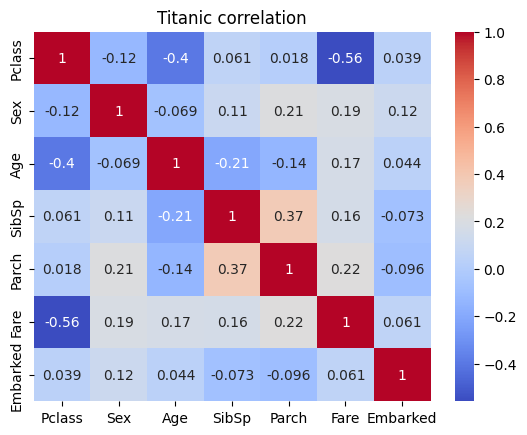

In [24]:
# 进行相关性分析
data2.replace({'Sex':{'male': 0, 'female': 1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

corr_matrix = data2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Titanic correlation')
plt.show()

### 添加组合特征

In [25]:
# 创建age_sex特征
def create_age_sex_feature(df):
    age, sex = df['Age'], df['Sex']
    
    if age < 16 and sex == 0:
        return 'child_male'
    
    elif age < 16 and sex == 1:
        return 'child_female'
    
    elif age >= 16 and sex == 0:
        return 'adult_male'
    
    elif age >= 16 and sex == 1:
        return 'adult_female'
    
    else:
        return 'unknown'

In [26]:
data3 = data2.copy()

In [27]:
data3['age_sex'] = data3.apply(create_age_sex_feature, axis=1)
data3

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_sex
0,3,0,22.0,1,0,7.2500,0,adult_male
1,1,1,38.0,1,0,71.2833,1,adult_female
2,3,1,26.0,0,0,7.9250,0,adult_female
3,1,1,35.0,1,0,53.1000,0,adult_female
4,3,0,35.0,0,0,8.0500,0,adult_male
...,...,...,...,...,...,...,...,...
1304,3,0,34.4,0,0,8.0500,0,adult_male
1305,1,1,39.0,0,0,108.9000,1,adult_female
1306,3,0,38.5,0,0,7.2500,0,adult_male
1307,3,0,34.4,0,0,8.0500,0,adult_male


In [28]:
data3['age_sex'].value_counts()

age_sex
adult_male      778
adult_female    410
child_male       65
child_female     56
Name: count, dtype: int64

In [31]:
data4 = pd.get_dummies(data3)

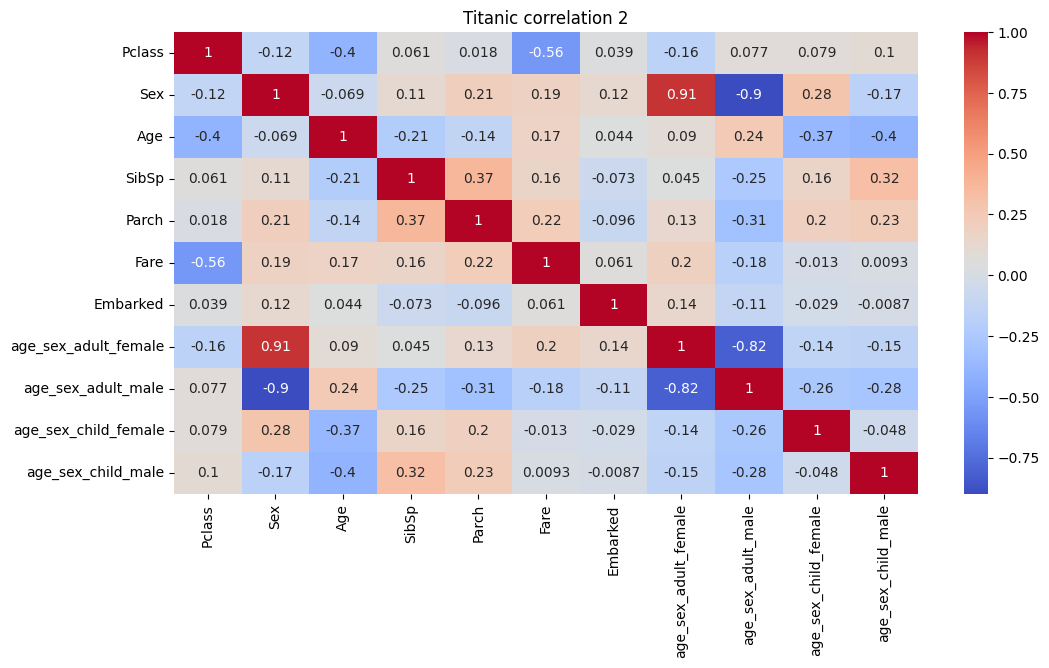

In [32]:
# 再次进行相关性分析
plt.figure(figsize=(12,6))

sns.heatmap(data4.corr(), annot=True, cmap='coolwarm')
plt.title('Titanic correlation 2')

plt.show()

## 重新拆分官方数据集

In [33]:
train_data = data4.loc[:train0.index.max(), :].copy()
test_data = data4.loc[train0.index.max()+1: , :].reset_index(drop=True).copy()

In [34]:
train_data.shape

(891, 11)

In [35]:
test_data.shape

(418, 11)

In [37]:
X = train_data
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 11), (712,), (179, 11), (179,))

In [40]:
# 线性回归模型
model = LogisticRegression()

model.fit(X_train, y_train)

C:\Users\UTE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
model.score(X_train, y_train)

0.8258426966292135

In [41]:
model.score(X_test, y_test)

0.8435754189944135

### 结果

In [46]:
predictions = model.predict(test_data)

In [47]:
predictions

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [48]:
submission = pd.read_csv("titanic/gender_submission.csv")
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [49]:
pred_submission = pd.concat([test_ids, pd.Series(predictions, name='Survived')], axis=1)
pred_submission.to_csv("titanic/My_submission.csv", index=False)

# 重新

In [53]:
# 线性回归模型
model2 = LogisticRegression()

model2.fit(X_train, y_train)

C:\Users\UTE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
X_train_prediction = model.predict(X_train)
traning_data_accuracy = accuracy_score(y_train, X_train_prediction)
print("Accuracy score of training data: ", traning_data_accuracy)

Accuracy score of training data:  0.8258426966292135


In [57]:
test_data_accuracy = accuracy_score(y_test, model.predict(X_test))
print("Accuracy score of test data: ", test_data_accuracy)

Accuracy score of test data:  0.8435754189944135


In [58]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_sex_adult_female,age_sex_adult_male,age_sex_child_female,age_sex_child_male
205,3,1,2.00,0,1,10.4625,0,False,False,True,False
305,1,0,0.92,1,2,151.5500,0,False,False,False,True
227,3,0,20.50,0,0,7.2500,0,False,True,False,False
737,1,0,35.00,0,0,512.3292,1,False,True,False,False
336,1,0,29.00,1,0,66.6000,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
211,2,1,35.00,0,0,21.0000,0,True,False,False,False
232,2,0,59.00,0,0,13.5000,0,False,True,False,False
451,3,0,20.40,1,0,19.9667,0,False,True,False,False
699,3,0,42.00,0,0,7.6500,0,False,True,False,False


In [59]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_sex_adult_female,age_sex_adult_male,age_sex_child_female,age_sex_child_male
0,3,0,34.5,0,0,7.8292,2,False,True,False,False
1,3,1,47.0,1,0,7.0000,0,True,False,False,False
2,2,0,62.0,0,0,9.6875,2,False,True,False,False
3,3,0,27.0,0,0,8.6625,0,False,True,False,False
4,3,1,22.0,1,1,12.2875,0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,34.4,0,0,8.0500,0,False,True,False,False
414,1,1,39.0,0,0,108.9000,1,True,False,False,False
415,3,0,38.5,0,0,7.2500,0,False,True,False,False
416,3,0,34.4,0,0,8.0500,0,False,True,False,False


In [60]:
predictions = model.predict(test_data)
predictions

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [63]:
model.score(test_data, submission['Survived'])

0.9234449760765551

In [66]:
submission2 = submission.copy()
submission2['Survived'] = predictions
submission2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [67]:
submission2.to_csv("titanic/My_submission2.csv", index=False)